# 3. (Comparar muestras de una Normal)

Prueba de Chi-cuadrado:
  Estadístico Chi-cuadrado: 56.7970
  p-valor: 0.0000
  Conclusión: Distribuciones diferentes

Prueba de Kolmogorov-Smirnov:
  Estadístico KS: 0.0290
  p-valor: 0.7947
  Conclusión: Misma distribución



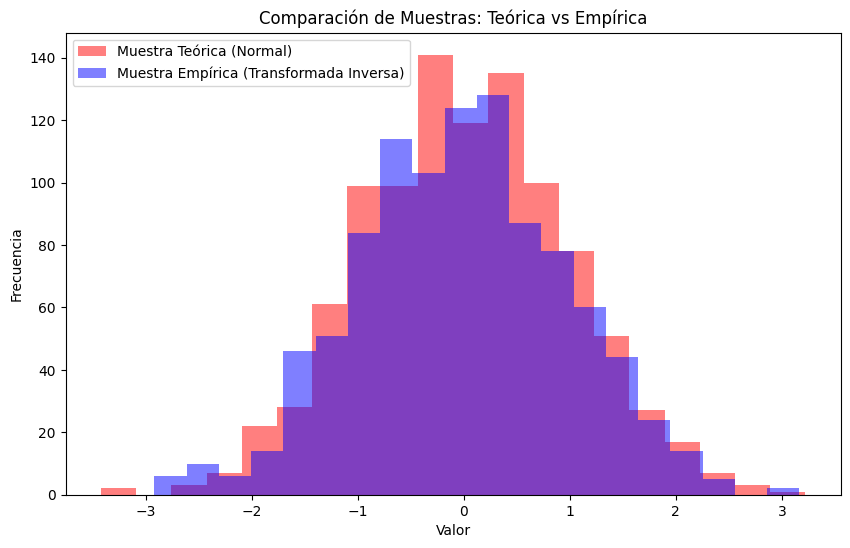

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2_contingency, ks_2samp

# Definir parámetros de la distribución normal
media = 0      # Valor medio de la distribución normal
desviacion_estandar = 1   # Desviación estándar de la distribución
N = 1000    # Número de datos en la muestra

# Paso 1: Crear la muestra teórica
# Generar una muestra aleatoria de una distribución normal con media y desviación estándar especificadas
muestra_teorica = norm.rvs(loc=media, scale=desviacion_estandar, size=N)

# Paso 2: Crear la muestra empírica usando el método de transformada inversa
# Generar valores aleatorios uniformes en el rango [0, 1]
valores_uniformes = np.random.uniform(0, 1, N)

# Aplicar la transformada inversa (función de distribución acumulativa inversa)
muestra_empirica = norm.ppf(valores_uniformes, loc=media, scale=desviacion_estandar)

# Paso 3: Comparar ambas muestras usando las pruebas de Chi-Cuadrado y Kolmogorov-Smirnov
# Prueba de Chi-Cuadrado
observado, _ = np.histogram(muestra_empirica, bins=20)
esperado, _ = np.histogram(muestra_teorica, bins=20)
chi2_stat, p_valor_chi2, _, _ = chi2_contingency([observado, esperado])

# Prueba de Kolmogorov-Smirnov
ks_stat, p_valor_ks = ks_2samp(muestra_empirica, muestra_teorica)

# Presentar resultados
resultados = {
    "Prueba de Chi-cuadrado": {
        "Estadístico Chi-cuadrado": chi2_stat,
        "p-valor": p_valor_chi2,
        "Conclusión": "Misma distribución" if p_valor_chi2 > 0.05 else "Distribuciones diferentes"
    },
    "Prueba de Kolmogorov-Smirnov": {
        "Estadístico KS": ks_stat,
        "p-valor": p_valor_ks,
        "Conclusión": "Misma distribución" if p_valor_ks > 0.05 else "Distribuciones diferentes"
    }
}

# Mostrar resultados
for prueba, valores in resultados.items():
    print(f"{prueba}:")
    for clave, valor in valores.items():
        if isinstance(valor, float):
            print(f"  {clave}: {valor:.4f}")
        else:
            print(f"  {clave}: {valor}")
    print()

# Paso 4: Graficar la comparación entre ambas distribuciones
plt.figure(figsize=(10, 6))
plt.hist(muestra_teorica, bins=20, alpha=0.5, label='Muestra Teórica (Normal)', color='r')
plt.hist(muestra_empirica, bins=20, alpha=0.5, label='Muestra Empírica (Transformada Inversa)', color='b')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Comparación de Muestras: Teórica vs Empírica')
plt.legend()
plt.show()


Aunque la prueba de Chi-Cuadrado sugiere que las muestras no provienen de la misma distribución, la prueba de Kolmogorov-Smirnov indica que las distribuciones son suficientemente similares a nivel general para considerarlas iguales.